# SPAM CLASSIFIER

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.DATA

In [2]:
df=pd.read_csv('data/spam.csv',encoding='iso-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df['Unnamed: 3'].unique()

array([nan, ' MK17 92H. 450Ppw 16"', ' why to miss them', 'GE',
       'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""',
       'i wil tolerat.bcs ur my someone..... But',
       ' ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\\""',
       'whoever is the KING\\"!... Gud nyt"', ' TX 4 FONIN HON',
       ' \\"OH No! COMPETITION\\". Who knew', 'IåÕL CALL U\\""'],
      dtype=object)

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.rename({'v1':'target','v2':'text'},axis=1,inplace=True)

In [10]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.duplicated().sum()

np.int64(403)

In [12]:
df.drop_duplicates()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


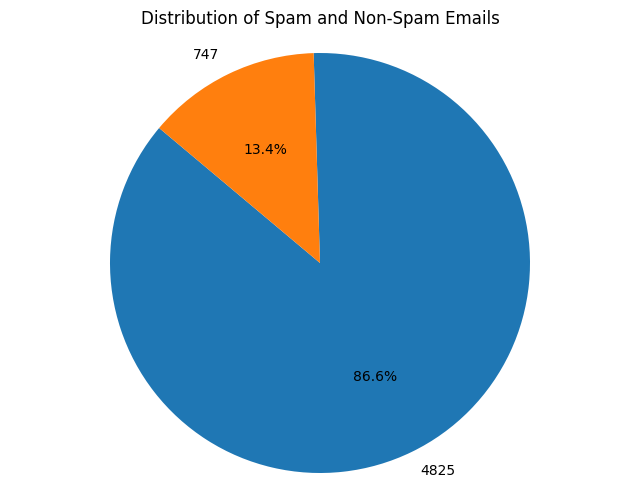

In [13]:
df['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(df['target'].value_counts(), labels=df['target'].value_counts(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal') 
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
import nltk

In [16]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
df['number_characters']=df['text'].apply(len)

In [18]:
from nltk.tokenize import word_tokenize
df['number_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))

In [19]:
from nltk.tokenize import sent_tokenize

df['number_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df

,target,text,number_characters,number_words,number_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [21]:
df[['number_characters','number_words','number_sentences']].describe()

,number_characters,number_words,number_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
df[df['target']==1][['number_characters','number_words','number_sentences']].describe()

,number_characters,number_words,number_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [23]:
df[df['target']==0][['number_characters','number_words','number_sentences']].describe()

,number_characters,number_words,number_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


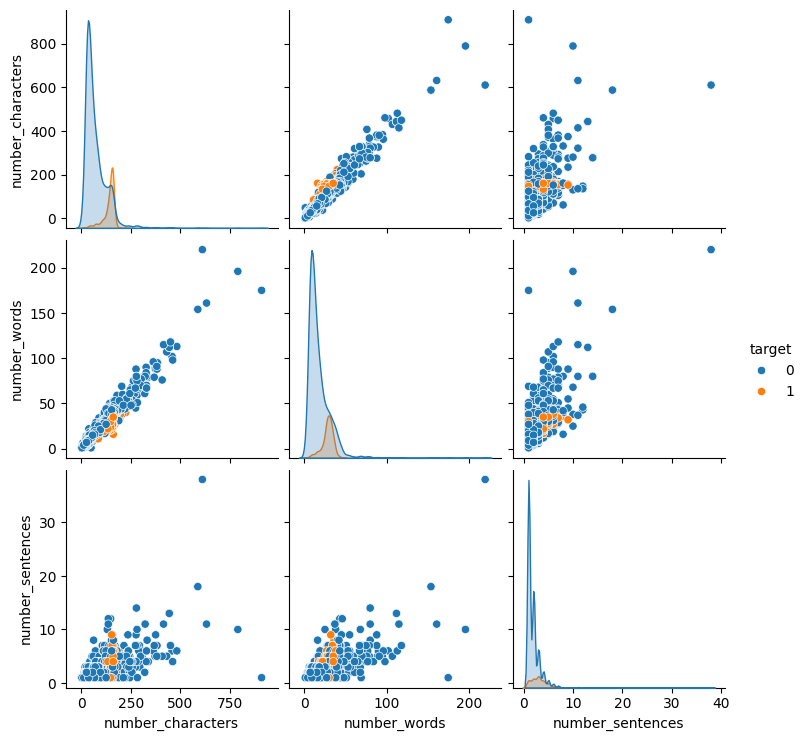

In [24]:
sns.pairplot(df,hue='target')

In [25]:
df_corr=df[['target','number_characters','number_words','number_sentences']].corr()

<Axes: >

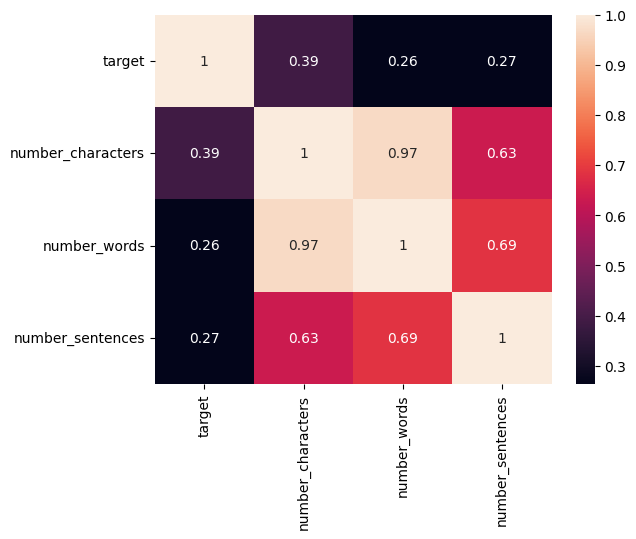

In [26]:
sns.heatmap(df_corr,annot=True)

Data Preprocessing

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer

In [29]:
ps = PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    x=[]

    for i in text:
        if i.isalnum():
            if i not in stopwords.words('english') and i not in punctuation:
                x.append(ps.stem(i))

    return " ".join(x)

In [30]:
df['tt']=df['text'].apply(transform_text)

In [31]:
df

,target,text,number_characters,number_words,number_sentences,tt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [32]:
from collections import Counter
from wordcloud import WordCloud

In [33]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [34]:
spam_wc = wc.generate(df[df['target'] == 1]['tt'].str.cat(sep=" "))

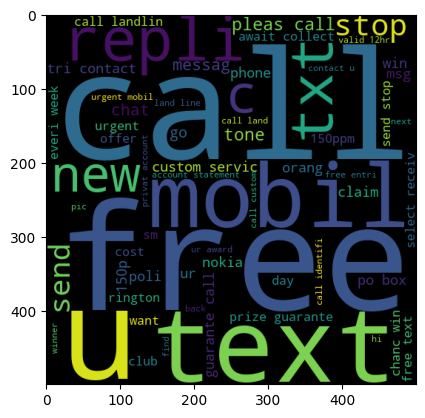

In [35]:
plt.imshow(spam_wc)

Top 25 Most Common Words in Spam Emails:
call: 365 occurrences
free: 219 occurrences
2: 174 occurrences
txt: 169 occurrences
ur: 144 occurrences
u: 141 occurrences
text: 139 occurrences
mobil: 135 occurrences
4: 120 occurrences
claim: 115 occurrences
stop: 114 occurrences
repli: 112 occurrences
prize: 94 occurrences
get: 88 occurrences
tone: 74 occurrences
servic: 72 occurrences
send: 70 occurrences
new: 69 occurrences
nokia: 68 occurrences
award: 66 occurrences
week: 62 occurrences
cash: 62 occurrences
urgent: 62 occurrences
win: 61 occurrences
contact: 61 occurrences


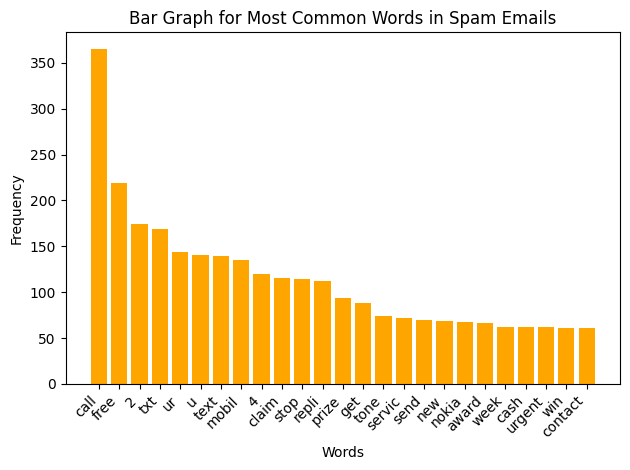

In [36]:
spam_emails = df[df['target'] == 1]['tt']
spam_words = ' '.join(spam_emails).split()
word_counts = Counter(spam_words)
most_common_words = word_counts.most_common(25)
print("Top 25 Most Common Words in Spam Emails:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")


words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
notspam_wc = wc.generate(df[df['target'] == 0]['tt'].str.cat(sep=" "))

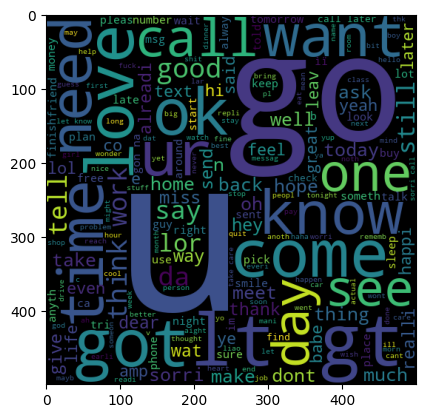

In [38]:
plt.imshow(notspam_wc)

Top 25 Most Common Words in Ha, Emails:
u: 979 occurrences
go: 417 occurrences
get: 357 occurrences
gt: 318 occurrences
lt: 316 occurrences
2: 300 occurrences
come: 295 occurrences
call: 291 occurrences
know: 248 occurrences
ok: 245 occurrences
like: 244 occurrences
got: 242 occurrences
love: 241 occurrences
ur: 237 occurrences
good: 230 occurrences
time: 228 occurrences
want: 212 occurrences
day: 212 occurrences
need: 174 occurrences
one: 174 occurrences
4: 163 occurrences
lor: 162 occurrences
home: 161 occurrences
sorri: 156 occurrences
see: 153 occurrences


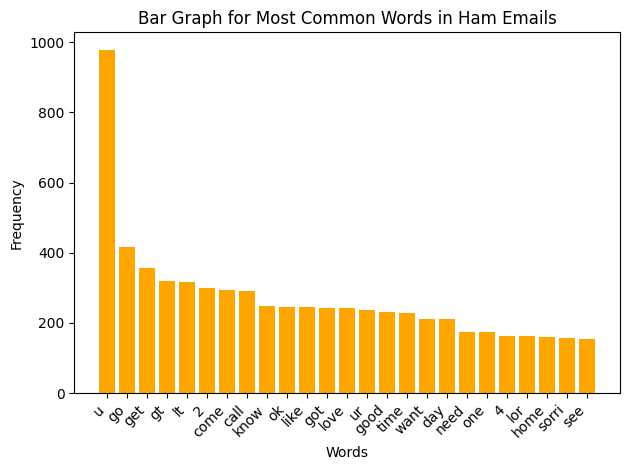

In [39]:
notspam_emails = df[df['target'] == 0]['tt']
notspam_words = ' '.join(notspam_emails).split()
word_counts = Counter(notspam_words)
most_common_words = word_counts.most_common(25)
print("Top 25 Most Common Words in Ha, Emails:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")


words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Ham Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
df

,target,text,number_characters,number_words,number_sentences,tt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# Model Building

In [54]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [64]:
tfidf=TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [65]:
Y=df['target']

In [71]:
X=tfidf.fit_transform(df['tt'])

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.25,random_state=5)

In [78]:
xtrain.shape

(4179, 3000)

In [79]:
ytest.shape

(1393,)

In [80]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}
param_grids = {
    'GaussianNB': {
        # Gaussian Naive Bayes does not have hyperparameters for tuning
    },
    'MultinomialNB': {
        'alpha': [0.1, 0.5, 1.0, 1.5],  # Smoothing parameter
    },
    'BernoulliNB': {
        'alpha': [0.1, 0.5, 1.0, 1.5],  # Smoothing parameter
        'binarize': [0.0, 0.5, 1.0],    # Binarization threshold
    }
}

In [81]:
for name, model in models.items():
    if name == 'GaussianNB':
        xtrain = xtrain.toarray()
        xtest =  xtest.toarray()
    grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=5, n_jobs=-1)
    grid_search.fit(xtrain, ytrain)
    print(f"\n{name}:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_:.4f}")
    ypred = grid_search.best_estimator_.predict(xtest)
    print(f"Test Accuracy: {accuracy_score(ytest, ypred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print(f"Precision Score: {precision_score(ytest, ypred):.4f}")


GaussianNB:
Best Parameters: {}
Best Score: 0.8636
Test Accuracy: 0.8708
Confusion Matrix:
[[1057  168]
 [  12  156]]
Precision Score: 0.4815

MultinomialNB:
Best Parameters: {'alpha': 0.1}
Best Score: 0.9811
Test Accuracy: 0.9806
Confusion Matrix:
[[1221    4]
 [  23  145]]
Precision Score: 0.9732

BernoulliNB:
Best Parameters: {'alpha': 0.1, 'binarize': 0.0}
Best Score: 0.9849
Test Accuracy: 0.9856
Confusion Matrix:
[[1224    1]
 [  19  149]]
Precision Score: 0.9933


I'm Happy with BernolliNB and especially its precision % which is utmost important for spam classification